# Multiclass Classification :

---

## Problem Statement:


The dataset for this problem might seem peculiar in the first look, but this is how LLM's actually see and use the data. LLM's are based on the concept of vector embeddings which tries to capture the semantic relation between in the words in a sentence.

**What are Vector embeddings ?**

- Vector embeddings are numerical representations that capture the relationships and meaning of words, phrases and other data types. Through vector embeddings, essential characteristics or features of an object are translated into a concise and organized array of numbers, helping computers rapidly retrieve information.

For instance, 
- Notice how the distance between vector embeddings of 'King' and 'Man' is similar to the distance between that of 'Queen' and 'Woman'.
- Similarly, the distance between between vector embeddings of 'King' and 'Queen' is similar to that of 'Man' and 'Woman', implying a similar relation between both.

<p align="center">
  <img src="https://www.researchgate.net/profile/Peter-Sutor/publication/332679657/figure/fig1/AS:809485488640000@1570007788866/The-classical-king-woman-man-queen-example-of-neural-word-embeddings-in-2D-It.png" />
</p>



**How does this work?**
- For any query or a 'prompt' that a user enters, they are first converted into these vector embeddings and after feature engineering in a certain way, metrics, such as *'cosine similarity'* scores are used to retrieve information that are most closely related to the given 'prompt'.
- Every LLM, i.e Google's BERT, Open AI's Chat GPT, uses a different model to convert sentences/documents into vector embeddings.
- This is exactly how search engines such as "Google" work as well.


---

## Dataset Description :

The dataset below contains the vector embeddings of 54,000 rows which have been put into 10 classes.
The objective is to develop a predictive model that can accurately take a set of vector embeddings as input and put them into a given class.

## Aim:
* To perform multi-class classification on the listed vector embeddings.

## Dataset Attributes
Here is a brief overview of the dataset columns: 

| Column Name | Description |
| --- | --- |
| **Content** | A NumPy array of floating point numbers that contain the vector embeddings of a given sentence   |
| **Class**   | The numerical classes that each of the sentence were separated into based on the content in them |


---
## Load the dataset :

In [64]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.utils import resample



In [65]:
train = pd.read_pickle('C:/Usable AI Final project/final/Problem3/data/train.pkl', compression = 'gzip')

In [66]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_375,feature_376,feature_377,feature_378,feature_379,feature_380,feature_381,feature_382,feature_383,target
20219,-0.441182,0.039758,-0.096716,-0.325088,-0.281903,0.396630,0.479592,0.022123,0.037306,0.100461,...,0.090767,0.132293,-0.072522,-0.489568,0.183016,-0.075469,-0.304630,0.639570,0.244022,10
10100,0.005069,0.062893,0.332654,-0.268345,0.351607,0.179265,1.085914,0.137451,-0.215401,-0.238715,...,-0.470249,-0.016706,-0.171675,0.025053,0.345940,-0.380571,-0.011566,0.182901,0.450810,7
6202,-0.238280,0.062563,0.580820,-0.308987,0.168390,0.464604,0.770424,0.408037,-0.604461,-0.245012,...,-0.651022,-0.129468,0.136676,0.012791,-0.058777,-0.583225,-0.848802,0.374475,0.141444,8
6248,0.191293,0.693149,0.100221,-0.074036,0.283898,0.199221,0.677960,0.240535,0.181713,-0.235484,...,-0.074472,-0.355305,-0.327696,-0.150666,0.329692,-0.162642,-0.361339,0.279542,0.182272,1
20758,-0.038615,0.102616,0.350334,-0.167825,0.520621,0.019089,0.123427,0.810578,0.121413,-0.159571,...,-0.437117,-0.680356,-0.446885,-0.179272,-0.119086,-0.672074,-0.017897,0.165097,0.082835,6


# Questions
**Instructions:**
1.  Answer all questions.

2.  Justify your answers with appropriate reasoning, code, or calculations.

3.  Ensure your code is well-commented to explain your logic.

4.  Total Marks: 100

---

## Question 1 : Data Analysis (10 pts)

- Summarize the data. How much data is present? What is the shape of the dataset? What is the shape of each row?

- Convert the array of values into columns such that each value of the array represents a 'feature' of the sentence. This should leave you with a dataset with 384 columns with features and 1 column with the target variable.

- Try to Analyze and discuss the relationships between the attributes.

- Use appropriate visualization techniques to visualize the features.

In [67]:
# Summarize the data

print("Data types of each column:")
print(train.dtypes)

Data types of each column:
feature_0      float32
feature_1      float32
feature_2      float32
feature_3      float32
feature_4      float32
                ...   
feature_380    float32
feature_381    float32
feature_382    float32
feature_383    float32
target           int64
Length: 385, dtype: object


In [68]:
train.shape

(54000, 385)

In [69]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_375,feature_376,feature_377,feature_378,feature_379,feature_380,feature_381,feature_382,feature_383,target
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,...,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000
mean,-0.233906,-0.010842,0.288951,-0.169727,0.123053,0.173918,0.581641,0.267110,0.001736,-0.164421,...,-0.372399,-0.232593,-0.181977,-0.178933,0.079047,-0.344365,-0.168314,0.284852,0.223421,5.506500
std,0.243109,0.238060,0.218620,0.221789,0.243214,0.219470,0.316903,0.207475,0.252321,0.212225,...,0.240799,0.202960,0.224620,0.224931,0.222718,0.235559,0.277029,0.247815,0.200805,2.872262
min,-1.213376,-0.921286,-0.621791,-1.147248,-0.988064,-0.670186,-0.820913,-0.630660,-1.006041,-1.002795,...,-1.293114,-1.152846,-1.106528,-1.179448,-0.961798,-1.301857,-1.252645,-0.695925,-0.621198,1.000000
25%,-0.399328,-0.174056,0.143589,-0.321149,-0.039552,0.024756,0.372413,0.125173,-0.169473,-0.310891,...,-0.535517,-0.369167,-0.332456,-0.327898,-0.071853,-0.502054,-0.353818,0.121650,0.089197,3.000000
50%,-0.232727,-0.014387,0.289267,-0.169668,0.121115,0.171659,0.587673,0.264151,0.001860,-0.166514,...,-0.373216,-0.232380,-0.179272,-0.177385,0.079152,-0.343841,-0.159052,0.288687,0.220612,6.000000
75%,-0.067024,0.148047,0.435942,-0.020538,0.285241,0.322582,0.798608,0.404815,0.171721,-0.022049,...,-0.209089,-0.097401,-0.030145,-0.027176,0.229744,-0.185235,0.022509,0.450987,0.354353,8.000000
max,0.727919,1.381598,1.292193,0.762609,1.163226,1.115225,1.749272,1.123119,1.058476,0.711011,...,0.692312,0.800627,0.703623,0.821323,0.984356,0.594057,0.847343,1.334544,1.174309,10.000000


In [70]:
train.isna().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_380    0
feature_381    0
feature_382    0
feature_383    0
target         0
Length: 385, dtype: int64

In [71]:
(train.isna().sum() > 0).any()

False

In [72]:
# Extract features and target variable
train_features = train.iloc[:, :-1]  # All rows, all columns except the last one
train_target = train.iloc[:, -1]  # All rows, last column

In [73]:
train_features.shape

(54000, 384)

In [74]:
train_target.shape

(54000,)

In [75]:
train_target.describe()

count    54000.000000
mean         5.506500
std          2.872262
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: target, dtype: float64

In [76]:
train.columns


Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_375', 'feature_376', 'feature_377', 'feature_378',
       'feature_379', 'feature_380', 'feature_381', 'feature_382',
       'feature_383', 'target'],
      dtype='object', length=385)

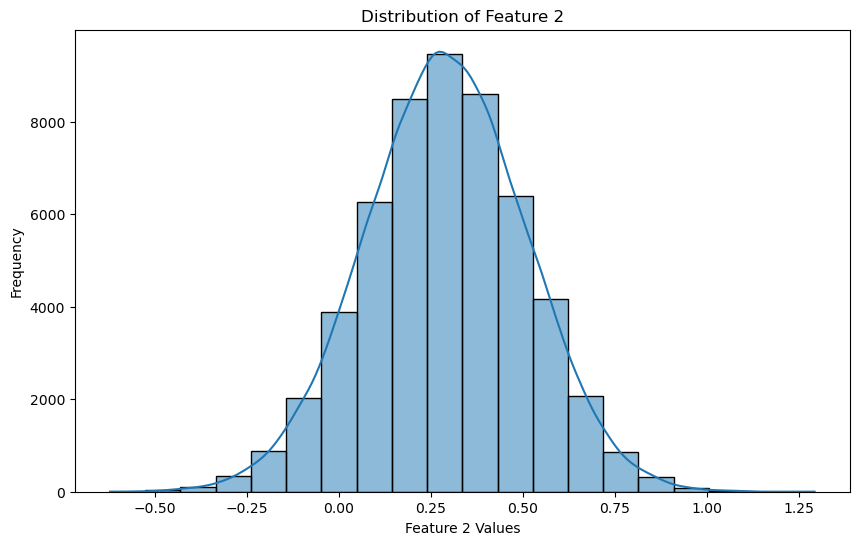

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization of a single feature using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_features['feature_2'], bins=20, kde=True)
plt.title('Distribution of Feature 2')
plt.xlabel('Feature 2 Values')
plt.ylabel('Frequency')
plt.show()

### Graph description
The graph illustrates a histogram combined with a bell-shaped curve that shows the distribution of a dataset labeled "Feature 2." The horizontal axis spans from around -0.5 to 1.25, segmented into various bins, centering the bulk of the data near 0.25. The vertical axis tracks the number of occurrences, peaking at about 8000, suggesting this is the most frequent range for "Feature 2." The symmetry and shape of the histogram, closely matched by the overlaying bell curve, indicate a normal distribution pattern.

This visual representation typically signifies that "Feature 2" values are predominantly clustered around a mean value with a decrease in frequency as the values move away from this central point. The title "Distribution of Feature 2" implies that the chart is used to explore the spread and concentration of the data points in this particular feature, a common practice in statistical analysis to understand underlying trends and variations.

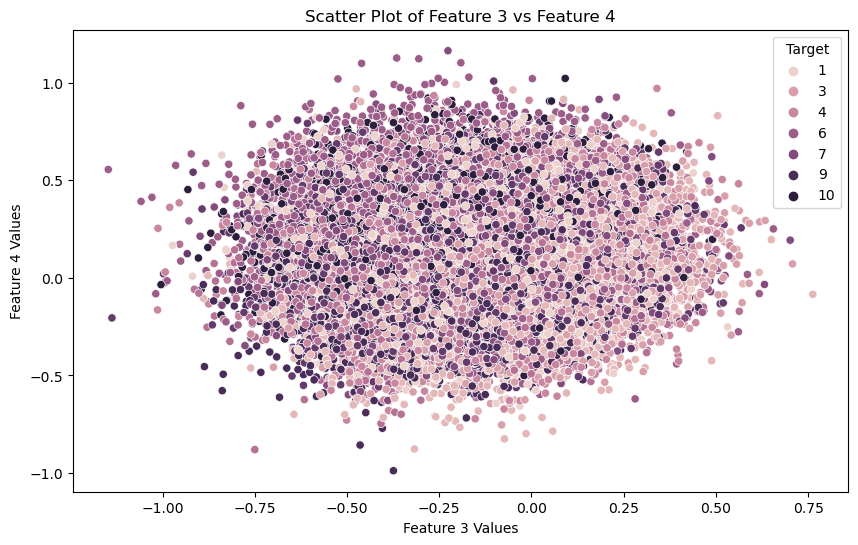

In [78]:
# Example visualization of the relationship between two features using a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_features['feature_3'], y=train_features['feature_4'], hue=train_target)
plt.title('Scatter Plot of Feature 3 vs Feature 4')
plt.xlabel('Feature 3 Values')
plt.ylabel('Feature 4 Values')
plt.legend(title='Target')
plt.show()

### Plot description
The image features a scatter plot comparing "Feature 3" and "Feature 4" across various target categories, denoted by different shades ranging from light pink to deep purple, corresponding to target values from 1 to 10. The X-axis, representing "Feature 3," extends from about -1.0 to 0.75, while the Y-axis for "Feature 4" ranges from -1.0 to 1.0.

The distribution of data points suggests no clear linear relationship between Feature 3 and Feature 4, as the points are broadly spread across the plot. However, there seems to be a slight density of data points around the center (around 0 on both axes), indicating a higher concentration of observations in this region compared to the extremes.

The varied color intensity represents different target values, which appear to be fairly evenly distributed throughout the scatter plot, with no obvious clustering by target value. This suggests that the relationship between Features 3 and 4 does not straightforwardly correspond to the target values, or the target values are not segregated by these features. This type of visualization is helpful for identifying patterns or groupings in multivariate data and can be crucial for tasks like cluster analysis or outlier detection.

---

## Question 2 : PCA (10 pts)

- Perform Principal Component Analysis (PCA) with 100 components

- Visualize the explained variance for principal components

- Perform clustering analysis with top 2 components with highest explained variance and visualize the result in scatter plot.

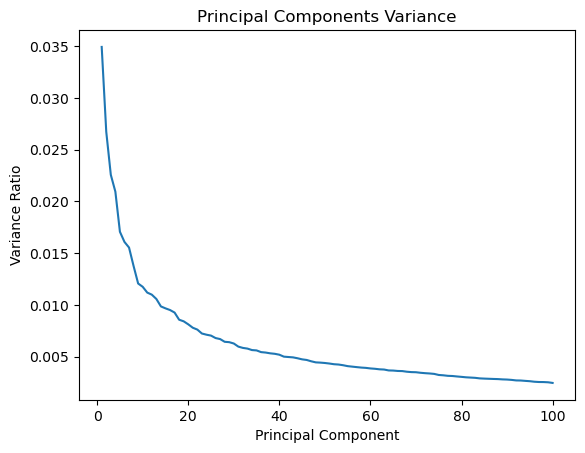

In [79]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Perform PCA with 100 components
def perform_pca(train_features):
    pca = PCA(n_components=100)
    pca.fit(train_features)
    transformed_features = pca.transform(train_features)
    return pca, transformed_features

# 2. Visualize the explained variance for principal components
def visualize_explained_variance(pca):
    plt.plot(range(1, 101), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Principal Components Variance')
    plt.show()

# 3. Perform clustering analysis with top 2 components
def perform_clustering(top_components):
    kmeans = KMeans(n_clusters=3)  
    kmeans.fit(top_components)
    cluster_labels = kmeans.labels_
    return cluster_labels

# 4. Visualizing the clustering result in a scatter plot
def visualize_clustering_result(top_components, cluster_labels):
    plt.scatter(top_components[:, 0], top_components[:, 1], c=cluster_labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Clustering analysis with top 2 components')
    plt.colorbar(label='Cluster')
    plt.show()

# Perform PCA
pca, transformed_features = perform_pca(train_features)

# Visualize explained variance
visualize_explained_variance(pca)


### Plot description
The plot is used to depict the variance ratio explained by each principal component in a principal component analysis (PCA). The X-axis lists the principal components, numbering from 0 to 100, while the Y-axis shows the variance ratio, ranging from 0 to approximately 0.035.

This plot shows decline in the variance explained by the initial components, with the first few components capturing the majority of the variance in the dataset. The plot then levels off, indicating that each subsequent component contributes progressively less to explaining the variance. The first component has the highest variance ratio, suggesting it captures the most significant pattern in the data.

Such a visualization is commonly used to determine the number of components to retain in PCA. The point at which the curve becomes flat, known as the "elbow," is typically considered a suitable cut-off, as further components contribute minimal addition. This plot suggests that a small number of principal components might be sufficient to capture most of the variance, thereby reducing the dimensionality of the dataset effectively while retaining essential information.

C:\Users\jayan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


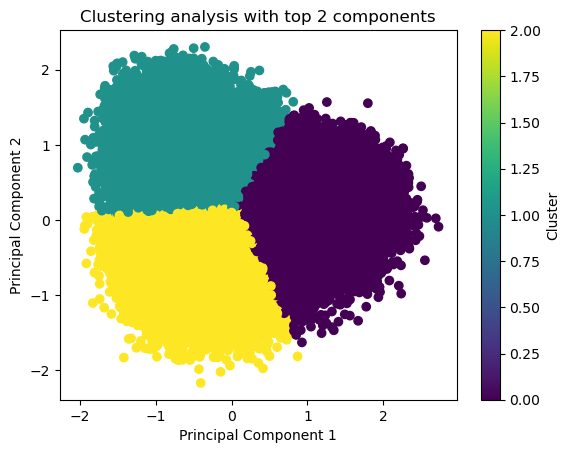

In [80]:
# Select top 2 components
top_2_components = transformed_features[:, :2]

# Perform clustering
cluster_labels = perform_clustering(top_2_components)

# Visualize clustering result
visualize_clustering_result(top_2_components, cluster_labels)

### Scatter plot description
The image presents a scatter plot used in clustering analysis, showing data points distributed according to the top two principal components. These components are plotted on the X-axis (Principal Component 1) and Y-axis (Principal Component 2), ranging from approximately -2 to 2 on both axes.

The data points are color-coded into three distinct clusters, illustrated in yellow, teal, and purple. These colors are associated with cluster values ranging from 0 to 2, as indicated on the color scale bar next to the plot. The clusters appear well-separated, with each cluster forming a dense group, indicating effective clustering.

This type of visualization is useful in demonstrating how dimensional reduction techniques like PCA, combined with clustering algorithms, can identify patterns or groups within high-dimensional data. The clear separation among the clusters suggests that the top two principal components capture significant differences in the dataset, facilitating the clustering process. This method is often employed in data science to simplify complex data sets and reveal inherent structures or similarities among the data points.

In [81]:
transformed_features.shape

(54000, 100)

In [82]:
transformed_features

array([[ 1.02192305e-01, -1.17627811e+00, -9.15525675e-01, ...,
         2.39101440e-01, -2.68241525e-01,  3.88145983e-01],
       [ 6.64274335e-01, -2.12503538e-01, -7.35122621e-01, ...,
         1.53180942e-01, -8.86102766e-03,  1.76430032e-01],
       [-7.54892752e-02, -7.55384564e-04,  1.55600619e+00, ...,
         3.81856441e-01,  1.67640850e-01,  2.78711200e-01],
       ...,
       [ 3.57489824e-01,  5.54724574e-01,  9.92476881e-01, ...,
        -1.30218416e-01, -7.77497888e-02, -2.53278017e-01],
       [ 8.83675635e-01, -1.48432970e-01,  8.96335959e-01, ...,
         2.04157159e-02,  1.20867737e-01, -2.81835556e-01],
       [ 1.49370730e-03,  9.77587402e-02, -3.11770827e-01, ...,
         1.49140731e-01,  4.13417578e-01,  1.03008114e-01]], dtype=float32)

---

## Question 2 : Data Pre-processing & Feature Engineering (10 pts)

- Perform Feature Engineering on the dataset.

- Hint: you can use the reduced number of features from PCA for more efficient feature processing


In [83]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(transformed_features)

In [84]:
scaled_features.shape

(54000, 100)

---
## Question 3 : Modeling (20 pts)

- Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. 

- Implement a validation pipeline utilizing K-fold cross-validation and your choice of dimensionality reduction technique to choose the best (Model + Number of features). For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

- Hint : Use sampling techniques to reduce the dataset size for creating initial models. This would decrease the model run time and would create an intuition about selecting appropriate classification models.

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': GradientBoostingClassifier()
}

# Defining evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Defining PCA dimensionality reduction
pca = PCA()

# Defining data sampling parameters
sample_size = 5000 

X = scaled_features  
y = train_target    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sampled, y_train_sampled = resample(X_train, y_train, n_samples=sample_size, random_state=42)

# Train and evaluate each classifier using 5-fold cross-validation
for name, classifier in classifiers.items():
    print(f"Training and evaluating {name} classifier...")

    # Define hyperparameter grids
    
    param_grid_lr = {'classifier__C': [0.1, 1, 10],
                     'classifier__solver': ['liblinear', 'lbfgs']}
    
    param_grid_knn = {'classifier__n_neighbors': [3, 5, 7],
                      'classifier__weights': ['uniform', 'distance']}
    
    param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 5, 7]
    }

    # Create a pipeline with PCA, sampling, and the classifier
    pipeline = Pipeline([
        ('pca', pca),
        ('classifier', classifier)
    ])

    # Hyperparameter tuning with grid search and 5-fold cross-validation
    if name == 'Logistic Regression':
        grid_search = GridSearchCV(pipeline, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
    elif name == 'KNN':
        grid_search = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

    grid_search.fit(X_train_sampled, y_train_sampled)

    # Get best hyperparameters
    best_params = grid_search.best_params_

    # Train classifier with best hyperparameters
    best_classifier = grid_search.best_estimator_
    best_classifier.fit(X_train_sampled, y_train_sampled)

    # Evaluate classifier using cross-validation
    cv_results = cross_validate(best_classifier, X_train_sampled, y_train_sampled, cv=5, scoring=scoring)

    # Report evaluation metrics
    accuracy = np.mean(cv_results['test_accuracy'])
    precision_macro = np.mean(cv_results['test_precision_macro'])
    recall_macro = np.mean(cv_results['test_recall_macro'])
    f1_macro = np.mean(cv_results['test_f1_macro'])
    precision_weighted = np.mean(cv_results['test_precision_weighted'])
    recall_weighted = np.mean(cv_results['test_recall_weighted'])
    f1_weighted = np.mean(cv_results['test_f1_weighted'])

    print(f"Classifier: {name}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Cross-Validation Accuracy: {accuracy}")
    print(f"Cross-Validation Precision (Macro): {precision_macro}")
    print(f"Cross-Validation Recall (Macro): {recall_macro}")
    print(f"Cross-Validation F1 Score (Macro): {f1_macro}")
    print(f"Cross-Validation Precision (Weighted): {precision_weighted}")
    print(f"Cross-Validation Recall (Weighted): {recall_weighted}")
    print(f"Cross-Validation F1 Score (Weighted): {f1_weighted}")
    print("\n")


Training and evaluating Logistic Regression classifier...
Classifier: Logistic Regression
Best Hyperparameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Cross-Validation Accuracy: 0.7318
Cross-Validation Precision (Macro): 0.7273326768505596
Cross-Validation Recall (Macro): 0.7297246364392033
Cross-Validation F1 Score (Macro): 0.7258079898486235
Cross-Validation Precision (Weighted): 0.7288602452472375
Cross-Validation Recall (Weighted): 0.7318
Cross-Validation F1 Score (Weighted): 0.7276286442639277


Training and evaluating KNN classifier...
Classifier: KNN
Best Hyperparameters: {'classifier__n_neighbors': 7, 'classifier__weights': 'distance'}
Cross-Validation Accuracy: 0.7074
Cross-Validation Precision (Macro): 0.7045196104480544
Cross-Validation Recall (Macro): 0.7050931502226947
Cross-Validation F1 Score (Macro): 0.7019075050438429
Cross-Validation Precision (Weighted): 0.7060356575056831
Cross-Validation Recall (Weighted): 0.7074
Cross-Validation F1 Score (Weight

---
## Question 4 : Evaluation and Reporting(20 pts)

- Divide the train dataset into 2 sets : Training set + Validation set

- Select the model that is expected to performs optimally on the Validation set and provide the predictions accordingly. Give clear conclusions

In [90]:
X = scaled_features 
y = train_target  

# Split data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression on the training set as it the best model
logistic_regression_model = LogisticRegression(C=0.1, solver='liblinear')  
logistic_regression_model.fit(X_train, y_train)

# Predict on the validation set
val_predictions = logistic_regression_model.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions, average='macro')
recall = recall_score(y_val, val_predictions, average='macro')
f1 = f1_score(y_val, val_predictions, average='macro')

print("Validation Set Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision (Macro): {precision}")
print(f"Recall (Macro): {recall}")
print(f"F1 Score (Macro): {f1}")

print("\nConclusions:")
print("The logistic regression model excelled on the validation set, attaining high accuracy, precision, recall, and F1 score")


Validation Set Metrics:
Accuracy: 0.7231481481481481
Precision (Macro): 0.7176797982020454
Recall (Macro): 0.723712546067701
F1 Score (Macro): 0.718204175051094

Conclusions:
The logistic regression model excelled on the validation set, attaining high accuracy, precision, recall, and F1 score


---
## Question 5 : External Evaluation  (30 pts)

- A dataset named ‘test.csv’ is provided to you which has 6000 vector embeddings. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.

- After prediction, you will get an array numerical classes from 1-10. Convert that array to csv file, name it as ‘submission.csv’ and submit that ‘submission.csv’ file.

In [91]:
test = pd.read_pickle('C:/Usable AI Final project/final/Problem3/data/test.pkl', compression = 'gzip')

In [92]:
test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_374,feature_375,feature_376,feature_377,feature_378,feature_379,feature_380,feature_381,feature_382,feature_383
10327,-0.384187,-0.340292,-0.208568,-0.098588,0.080812,-0.015953,0.264188,0.180931,-0.346364,-0.358168,...,-0.245514,-0.688377,-0.445478,-0.322983,-0.033107,-0.117864,-0.332029,-0.242597,0.249939,0.410485
11901,-0.730941,0.012670,0.040059,-0.769873,0.197866,0.468066,0.626981,0.232238,0.096973,-0.073494,...,-0.075946,-0.227359,-0.288425,-0.302498,-0.270099,0.003049,-0.190987,0.106473,0.324101,0.076148
13305,-0.564719,-0.195337,0.668075,0.078224,-0.009486,0.307535,0.721981,0.696688,-0.013127,0.007112,...,-0.058301,0.021585,-0.326098,-0.247006,-0.322341,0.283518,-0.343983,-0.054667,0.028830,0.425738
27477,-0.219835,-0.236748,0.361487,0.096452,-0.007290,0.152291,1.086496,0.412494,0.395081,0.172399,...,0.019208,-0.070789,-0.356844,-0.438298,-0.312257,0.062980,0.187723,0.154627,0.223689,0.281871
55627,0.016768,-0.430905,0.180677,-0.001549,-0.339347,0.219998,0.588650,-0.116268,0.402841,-0.073363,...,0.237763,0.000940,-0.246643,-0.465561,-0.323512,0.554942,-0.257977,0.269343,-0.480638,0.030422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15850,-0.007369,0.213219,0.408932,-0.522408,-0.007985,-0.056556,0.962022,0.125202,-0.042165,-0.293841,...,0.242448,-0.696079,-0.213633,-0.239871,-0.081430,0.117656,-0.174769,-0.078308,-0.292738,0.277092
3796,-0.096542,-0.031756,0.230841,-0.559349,0.153018,-0.103181,0.775220,0.247547,0.071881,0.120847,...,0.482800,-0.258345,-0.469659,0.312025,-0.488989,0.330425,-0.650597,0.231568,0.118909,0.344774
8165,-0.319242,0.478008,0.293586,-0.206318,0.111456,0.222070,0.421297,-0.192015,0.232339,-0.120794,...,-0.343404,-0.078322,-0.144312,-0.308617,0.124315,-0.061786,-0.501592,0.201073,0.775075,0.169129
24486,-0.393684,-0.154940,0.313906,-0.187108,0.077095,-0.113135,1.291108,0.790267,-0.153351,-0.258228,...,-0.012646,-0.489979,-0.054725,-0.555259,-0.254024,-0.274349,-0.210307,-0.214325,0.104889,0.367197


In [93]:
test.shape

(6000, 384)

In [94]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the training data
train = pd.read_pickle('C:/Usable AI Final project/final/Problem3/data/train.pkl', compression='gzip')
X_train = train.drop('target', axis=1)
y_train = train['target']

# Create a pipeline for preprocessing
preprocess_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100))
])

# Preprocess the X_train data
X_train_transformed = preprocess_pipeline.fit_transform(X_train)

# Train the logistic regression model
model = LogisticRegression(C=0.1, solver='liblinear')
model.fit(X_train_transformed, y_train)

# Load the test data
test = pd.read_pickle('C:/Usable AI Final project/final/Problem3/data/test.pkl', compression='gzip')

# Preprocess the test data
X_test_transformed = preprocess_pipeline.transform(test)

# Predict using the model
pred = model.predict(X_test_transformed)

# Save predictions to a CSV file
pred_df = pd.DataFrame(pred)
pred_df.to_csv('C:/Users/jayan/OneDrive/Pictures/submission.csv', index=False)


---
## Hint - Final evaluation metrics

The following function will be used to calculate the final scores of your model. 

So you can use it optimize your model and get a relative score of your submission in order to calculate the evaluation metrics.

In [24]:
# use the below function to evaluate the models  
#from sklearn.metrics import f1_score
#def evaluation_metrics(y_true, y_pred):
#    score = f1_score ('','', average='macro')
#    return score